### Figure 3,4: multipanel overview of all countries
Grouped by country area

In [2]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import pygeos as pyg
import sys
import json
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from matplotlib.lines import Line2D

sys.path.append("../scripts")
from utils import *
from Europe_utils import *
from visualisations_new import aggregate_results_step1, aggregate_results_step2, percolation_summary, main

#Suppress pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

config = load_config(file='config-KeesWork.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/frederiques_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/combined_results/combined_preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/combined_results/combined_main_output')}}

In [3]:
df,df_abs,df_rel = main(config,constrain_reps=200)

perc_overview = percolation_summary(df)
perc_overview

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 30 countries
Grouping per AoI-country combination


../scripts\visualisations_new.py:219: UserWarning: Number of repetitions per #aoi is constrained to 200
  warn('Number of repetitions per #aoi is constrained to {}'.format(constrain_reps))
../scripts\visualisations_new.py:238: UserWarning: Spain: Only 198 repetitions for 9 AoIs at the same time
  warn('{}: Only {} repetitions for {} AoIs at the same time'.format(cntr,reps,nr_aoi))


 -------- main() finished --------


,AoIs,Reps_unique,Mode_reps,Frequency_mode_reps
Albania,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[176, 200, 1]",200,14
Austria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Belgium,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[183, 200, 1]",200,14
Bulgaria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,19
Croatia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,17
Czechia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Estonia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[139, 200, 1]",200,14
Finland,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,29
Germany,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,29
Greece,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18


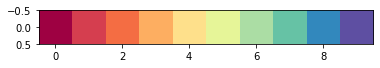

In [4]:
#colorscheme
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
roads_cc = colors[0:5][::-1] #We iterate over the roads in reversed order
roads_lw_cc = [1,0.7,0.5,.3,.3][::-1] #linewidth cycler
nuts_fill = '#abdda4'
nuts_border = '#66c2a5'

length_cols = ['Total_Edge_Length', 'Len_Motorway', 'Len_Trunk', 'Len_Primary', 'Len_Secondary', 'Len_Tertiary']

road_types = ['motorway','trunk','primary','secondary','tertiary']

plt.imshow(to_rgba_array(colors).reshape(1,len(colors),4))
plt.show()


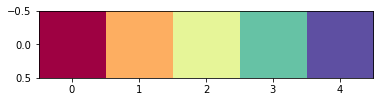

In [5]:
#5 contrasting colors
c = [j for j in colors]
color_5 = [c[0],c[3],c[5],c[7],c[9]]
plt.imshow(to_rgba_array(color_5).reshape(1,len(color_5),4))
plt.show()

In [6]:
import matplotlib as mpl

font = {'family' : 'arial'}
mpl.rc('font', **font)  # pass in the font dict as kwargs
grey = '#444444'
mpl.rcParams.update({'text.color' : grey,
                     'axes.labelcolor' : grey,
                     'axes.titlecolor' : grey,
                     'axes.edgecolor' : grey,
                     'xtick.color': grey, #This is the color of the categories on y- and x-axis
                     'ytick.color': grey                    })


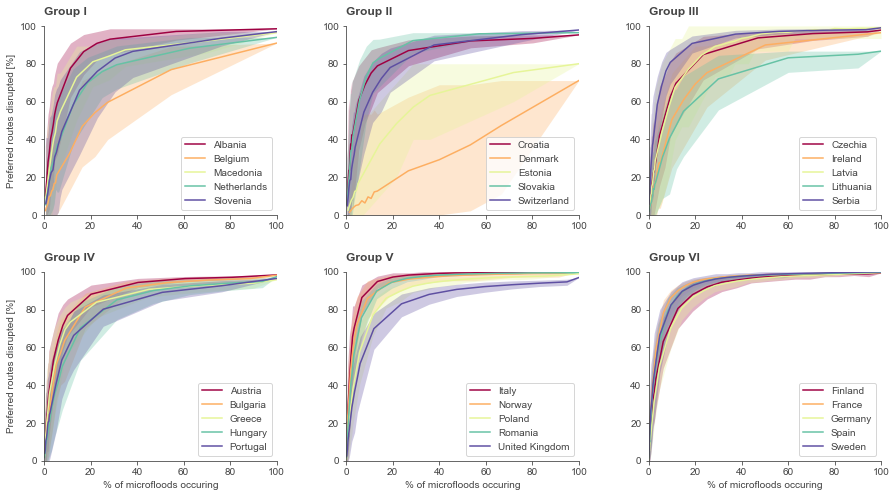

In [7]:
from visualisations_new import aggregated_lineplot_new
import matplotlib.pyplot as plt

group_file = config['paths']['data'] / 'groups' / '6groupsof6_byactivesize.json'
with open(group_file, 'rb') as f:
    groups = json.load(f)
groups = groups['groups']

fill_between=('q_05','q_95')

rows = 2
cols = 3
fig,axes = plt.subplots(rows,cols,figsize=(15,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

panels = ['I','II','III','IV','V','VI']

for group in groups.items():
    i = int(group[0])
    #print(i,i//cols,i%cols)
    ax_row = i//cols #x_coordinate of ax
    ax_col = i%cols #y_coordinate of ax
    countries = country_names(group[1])
    fig, ax = aggregated_lineplot_new(df_rel,countries,fill_between=fill_between,save=False,fig=fig,ax=axes[ax_row][ax_col],clrs=color_5)
    
    axes[ax_row][ax_col].text(0, 110, "Group {}".format(panels[i]), #transform=axes[ax_row][ax_col].transAxes,
                       fontsize=12, fontweight='bold', va='top',color=grey)


    

for row in axes:
    for ax in row:
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        #remove labels
        ax.set_ylabel(ylabel=None)
        ax.set_xlabel(xlabel=None)
        
        ax.set_ylim(0,100)
        ax.set_xlim(0,100)
        
        ax.legend(handles=handles,title='Legend',loc='best')

axes[0,0].set_ylabel(ylabel='Preferred routes disrupted [%]')
axes[1,0].set_ylabel(ylabel='Preferred routes disrupted [%]')

axes[1,0].set_xlabel(xlabel='% of microfloods occuring')
axes[1,1].set_xlabel(xlabel='% of microfloods occuring')
axes[1,2].set_xlabel(xlabel='% of microfloods occuring')

#Correct typo with dirty fix
if axes[1,1].legend_.texts[4]._text == 'United kingdom':
    axes[1,1].legend_.texts[4]._text = 'United Kingdom'

In [8]:
fig.savefig('Paper_fig34/figure3_rel.pdf')
fig.savefig('Paper_fig34/figure3_rel.png',bbox_inches='tight',dpi=400)

### Absolute

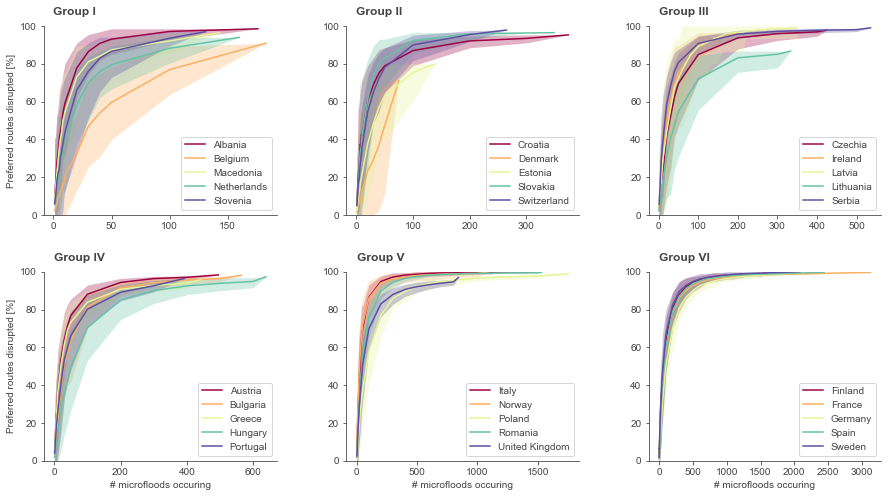

In [9]:
from visualisations_new import aggregated_lineplot_new
import matplotlib.pyplot as plt

group_file = config['paths']['data'] / 'groups' / '6groupsof6_byactivesize.json'
with open(group_file, 'rb') as f:
    groups = json.load(f)
groups = groups['groups']

fill_between=('q_05','q_95')

rows = 2
cols = 3
fig,axes = plt.subplots(rows,cols,figsize=(15,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

panels = ['I','II','III','IV','V','VI']

for group in groups.items():
    i = int(group[0])
    #print(i,i//cols,i%cols)
    ax_row = i//cols #x_coordinate of ax
    ax_col = i%cols #y_coordinate of ax
    countries = country_names(group[1])
    fig, ax = aggregated_lineplot_new(df_abs,countries,fill_between=fill_between,save=False,fig=fig,ax=axes[ax_row][ax_col],clrs=color_5)
    
    axes[ax_row][ax_col].text(0, 110, "Group {}".format(panels[i]), #transform=axes[ax_row][ax_col].transAxes,
                       fontsize=12, fontweight='bold', va='top',color=grey)


    

for row in axes:
    for ax in row:
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        #remove labels
        ax.set_ylabel(ylabel=None)
        ax.set_xlabel(xlabel=None)
        
        ax.set_ylim(0,100)
        #ax.set_xlim(0,100)
        
        ax.legend(loc='lower right')

axes[0,0].set_ylabel(ylabel='Preferred routes disrupted [%]')
axes[1,0].set_ylabel(ylabel='Preferred routes disrupted [%]')

axes[1,0].set_xlabel(xlabel='# microfloods occuring')
axes[1,1].set_xlabel(xlabel='# microfloods occuring')
axes[1,2].set_xlabel(xlabel='# microfloods occuring')

#Correct typo with dirty fix
if axes[1,1].legend_.texts[4]._text == 'United kingdom':
    axes[1,1].legend_.texts[4]._text = 'United Kingdom'

In [10]:
fig.savefig('Paper_fig34/figure3_abs.pdf')
fig.savefig('Paper_fig34/figure3_abs.png',bbox_inches='tight',dpi=400)

# No detour

In [11]:
from visualisations_new import process_no_detour, no_detour_aggregated_lineplot
#LOAD AND PROCESS NO DETOUR RESULTS
no_dt_abs, no_dt_rel = process_no_detour(df)

 -------- Process_no_detour() finished --------


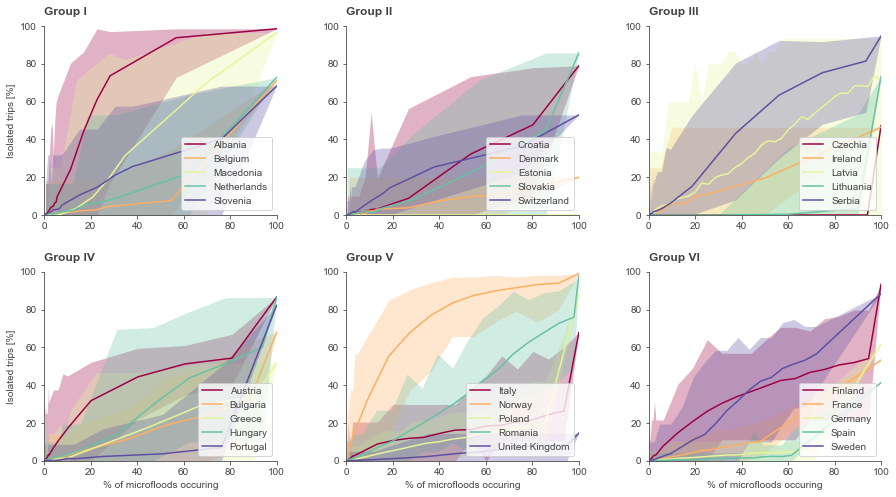

In [12]:
from visualisations_new import aggregated_lineplot_new
import matplotlib.pyplot as plt

group_file = config['paths']['data'] / 'groups' / '6groupsof6_byactivesize.json'
with open(group_file, 'rb') as f:
    groups = json.load(f)
groups = groups['groups']

fill_between=('q_05','q_95')

rows = 2
cols = 3
fig,axes = plt.subplots(rows,cols,figsize=(15,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

panels = ['I','II','III','IV','V','VI']

for group in groups.items():
    i = int(group[0])
    #print(i,i//cols,i%cols)
    ax_row = i//cols #x_coordinate of ax
    ax_col = i%cols #y_coordinate of ax
    countries = country_names(group[1])
    #fig, ax = aggregated_lineplot_new(df_abs,countries,fill_between=fill_between,save=False,fig=fig,ax=axes[ax_row][ax_col],clrs=color_5)
    fig, ax = no_detour_aggregated_lineplot(no_dt_rel,countries,save=False,fig=fig,ax=axes[ax_row][ax_col],clrs=color_5)
    
    axes[ax_row][ax_col].text(0, 110, "Group {}".format(panels[i]), #transform=axes[ax_row][ax_col].transAxes,
                       fontsize=12, fontweight='bold', va='top',color=grey)


    

for row in axes:
    for ax in row:
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        #remove labels
        ax.set_ylabel(ylabel=None)
        ax.set_xlabel(xlabel=None)
        
        ax.set_ylim(0,100)
        ax.set_xlim(0,100)
        
        ax.legend(loc='lower right')

axes[0,0].set_ylabel(ylabel='Isolated trips [%]')
axes[1,0].set_ylabel(ylabel='Isolated trips [%]')

axes[1,0].set_xlabel(xlabel='% of microfloods occuring')
axes[1,1].set_xlabel(xlabel='% of microfloods occuring')
axes[1,2].set_xlabel(xlabel='% of microfloods occuring')

#Correct typo with dirty fix
if axes[1,1].legend_.texts[4]._text == 'United kingdom':
    axes[1,1].legend_.texts[4]._text = 'United Kingdom'

In [13]:
fig.savefig('Paper_fig34/figure4_rel.pdf')
fig.savefig('Paper_fig34/figure4_rel.png',bbox_inches='tight',dpi=400)